# Final Project

Name: Mitchell MacDonald

### Abstract/Motivation

For my final project, I decided the do the Python reinforcement given my lack of knowledge for programming. The assignment I decided to do revisit was Computer Assignment 6, which introduced a more complex RC circuit with an extra loop. I decided to take this assignment one step further: by adding several loops and introduce several different currents, resistors, capacitors, and an extra voltage source, shown below:
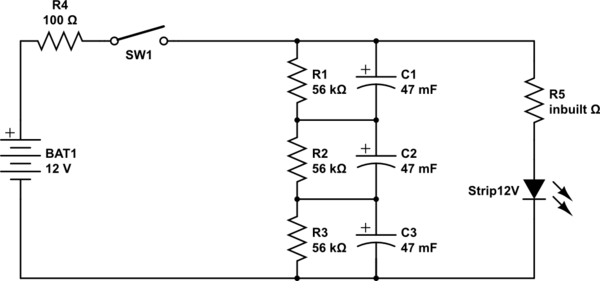
My expectations for this circuit is that the currents connected the capacitors will all approach zero as the capacitor increases in charge while the voltage of the respect capacitor increases until it reaches a max. I also predict that the voltage of the respective capacitor will be greater than a single capacitor voltage in a circuit. The reason I chose this topic was that I found complex RC circuits interesting and I found it frustrating that I was unable to institute the proper code for the assignment.

### Process

I plan to arrange my experiment based on the equations derived by Kirchhoff’s rules for multiloop circuits, then I’d define constants for the Resistors, Capacitor and Battery voltage, and would use these values to define a time constant (RC). I would then set up arrays for each current and charge for each capcitor and calculate the values using the loop rules to see how the current of each branch changes as time passes. I would also observe the respective voltages for each capacitor. The value for R5 isn't given, so I decided the give it the same value of R4. To make calulations easier, I simplified the circuit:
https://documentcloud.adobe.com/link/track?uri=urn:aaid:scds:US:165a57d7-27d0-4000-8b4a-d4efb026d5d5


### Code

In [219]:
import numpy as np              
import matplotlib.pyplot as plt

In [220]:
#Define constants
R1=0.056  #Ohms
R2=0.056
R3=0.056
R4=100
R5=100
C1=47*10**-6 #Farads
C2=47*10**-6
C3=47*10**-6
V_b=12 #Volts

In [221]:
#define time constants
R_eq=R4+((R5*(R1+R2+R3))/(R1+R2+R3+R5))
C_eq=(C1*C2*C3)/((C1*C2)+(C1*C3)+(C1*C2))
RC=R_eq*C_eq
dt=RC
timesteps = np.arange(0, 5*RC, dt)

Capacitors:
$$C_1=C_2=C_3$$
Equations for current:

Because the inside Resistors and Capacitors are equal:
$$I_4=I_6=I_8$$
$$I_5=I_7=I_9$$

$$I_1=I_2+I_3$$
$$I_2=I_4+I_5$$
$$I_4=I_5$$

Voltage Equations:
$$-I_3R_5+12V+12V+I_1R_4=0$$
$$-I_4+\frac{Q}{C}=0$$
$$-3(I_4R_1)+12V-I_1R_4=0$$
$$-3\frac{Q}{C_1}+12V-I_1R_4=0$$




In [222]:
#Create Placeholder Arrays
Qarray = np.zeros(timesteps.shape)
I1array = np.zeros(timesteps.shape)
I2array = np.zeros(timesteps.shape)
I3array = np.zeros(timesteps.shape)
I4array = np.zeros(timesteps.shape)
I5array = np.zeros(timesteps.shape)

Q = 0 #Initial Charge
I1 = V_b/R_eq
I2 = 8-(2*((I1*R4)/3))
I3 = (24+(I1*R4))/R5
#I4= 4-((I1*R4)/3)
#I5= I4

In [223]:
for i, timestep in enumerate(timesteps):
    #Populate Arrays
    I1array[i] = I1
    I2array[i] = I2
    I3array[i] = I3
    #I4array[i] = I4
    #I5array[i] = I5
    Qarray[i] = Q
    
    #Update Values
    I3 = (12+(3*Q/C1))/R5           
    I1 = I2 + I3   
    I4= (1/R1)*(Q/C1)
    I5= I4
    I2=I4+I5
    dQ = I5*dt                    
    Q +=dQ   

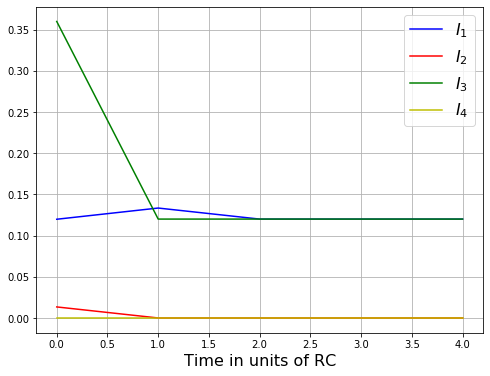

In [224]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(timesteps/RC, I1array, color='b', label='$I_1$')
ax.plot(timesteps/RC, I2array, color='r', label='$I_2$')
ax.plot(timesteps/RC, I3array, color='g', label='$I_3$')
ax.plot(timesteps/RC, I4array, color='y', label='$I_4$')
ax.set_xlabel('Time in units of RC', fontsize=16)
ax.legend(fontsize=16)
ax.grid()

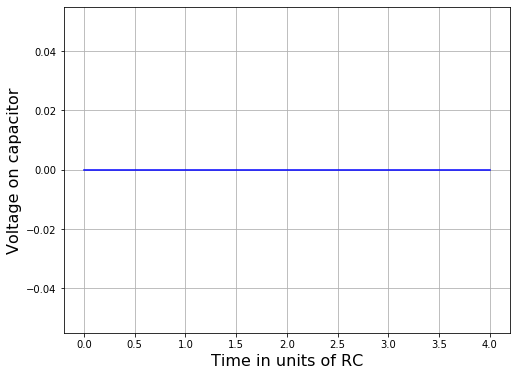

In [226]:
#plot voltage of the capacitor
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(timesteps/RC, Qarray/C_eq, color='b')
ax.set_xlabel('Time in units of RC', fontsize=16)
ax.set_ylabel('Voltage on capacitor', fontsize=16)
ax.grid()

### Results/Discussion

From the plots, its evident that something went wrong in my code in terms of units, given that the graphs have sharp inclines and declines. I expected a smoother, exponential decline for both currents 2 and 4. From interpretion, the plots for both currents 2 and 4 seem correct given that I calaculated current 4 to be half of current 2 and they both decrease because of the capacitors. As a result, current 1 should move up then down given the increase in voltage from current 3. For the capacitor voltage, the plot looks nothing like what I predicted given that I expected an steady increase then level out. This could be due to some errors in my calaculations from Kirchhoff's equations. Ideally, I expected the capacitor voltage to be greater than I si